## Question 2: What about the numbers?  

    
   * Top 10 most produced Genres
   * Average Budget per Genre
   * Caculate Profit by Genre
   * Calculate Gross Profit Margin by Genre (how much money in return per every dollar invested)


To answer this question I will use a combination of the genres_df and numbers_df dataframes. I will apply my knowledge of finances here to go a step further and calculate the average Gross Profit Margin or Ratio. This is obtained $(GrossIncome - ProductionCost)/GrossIncome$ This operation returns a decimal number which represents the return an investor gets per every dollar invested. I will be expressing the margin as a percentage (%).

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%store -r genres_df
%store -r numbers_df

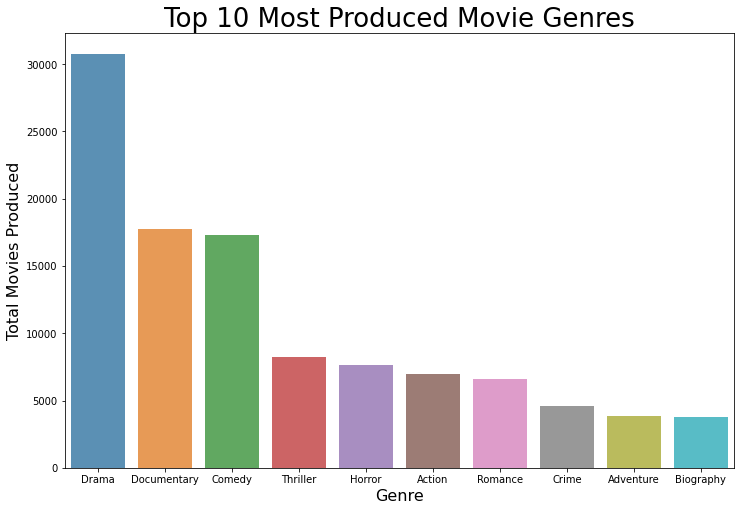

In [96]:
genres_count = genres_df['genres'].value_counts()
genres_count = genres_count[:10,]
plt.figure(figsize=(12,8))
sns.barplot(genres_count.index, genres_count.values, alpha=0.8)
plt.title('Top 10 Most Produced Movie Genres', fontsize=26)
plt.ylabel('Total Movies Produced', fontsize=16)
plt.xlabel('Genre', fontsize=16) 
plt.show()

Up next, I will merge genres_df and numbers_df to obtain financial information per genre.

In [97]:
numbers_by_genre = pd.merge(genres_df, numbers_df, on='movie', how='right')
numbers_by_genre.info()
numbers_by_genre.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5610 entries, 0 to 5609
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   movie              5610 non-null   object
 1   genres             5203 non-null   object
 2   production_budget  5610 non-null   int64 
 3   domestic_gross     5610 non-null   int64 
 4   worldwide_gross    5610 non-null   int64 
 5   year               5610 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 306.8+ KB


,movie,genres,production_budget,domestic_gross,worldwide_gross,year
0,Pirates of the Caribbean: On Stranger Tides,Action,410600000,241063875,1045663875,2011
1,Pirates of the Caribbean: On Stranger Tides,Adventure,410600000,241063875,1045663875,2011
2,Pirates of the Caribbean: On Stranger Tides,Fantasy,410600000,241063875,1045663875,2011
3,Dark Phoenix,Action,350000000,42762350,149762350,2019
4,Dark Phoenix,Adventure,350000000,42762350,149762350,2019


In [98]:
numbers_by_genre['gross_profit'] = numbers_by_genre['worldwide_gross'] - numbers_by_genre['production_budget']

In [99]:
numbers_by_genre['worldwide_gross'].replace(0, 1)

0       1045663875
1       1045663875
2       1045663875
3        149762350
4        149762350
           ...    
5605             1
5606             1
5607             1
5608             1
5609             1
Name: worldwide_gross, Length: 5610, dtype: int64

In [100]:
numbers_by_genre['gross_margin'] = (
    numbers_by_genre['gross_profit'].div(numbers_by_genre['worldwide_gross'])*100)

In [101]:
numbers_by_genre = numbers_by_genre[numbers_by_genre['gross_margin'] >= 0]
numbers_by_genre.info()
numbers_by_genre.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3533 entries, 0 to 5599
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie              3533 non-null   object 
 1   genres             3331 non-null   object 
 2   production_budget  3533 non-null   int64  
 3   domestic_gross     3533 non-null   int64  
 4   worldwide_gross    3533 non-null   int64  
 5   year               3533 non-null   int64  
 6   gross_profit       3533 non-null   int64  
 7   gross_margin       3533 non-null   float64
dtypes: float64(1), int64(5), object(2)
memory usage: 248.4+ KB


,movie,genres,production_budget,domestic_gross,worldwide_gross,year,gross_profit,gross_margin
0,Pirates of the Caribbean: On Stranger Tides,Action,410600000,241063875,1045663875,2011,635063875,60.733080
1,Pirates of the Caribbean: On Stranger Tides,Adventure,410600000,241063875,1045663875,2011,635063875,60.733080
2,Pirates of the Caribbean: On Stranger Tides,Fantasy,410600000,241063875,1045663875,2011,635063875,60.733080
6,Avengers: Age of Ultron,Action,330600000,459005868,1403013963,2015,1072413963,76.436443
7,Avengers: Age of Ultron,Adventure,330600000,459005868,1403013963,2015,1072413963,76.436443


In [102]:
genre_grp = numbers_by_genre.groupby(numbers_by_genre.genres)

In [103]:
mean_budget = genre_grp['production_budget'].mean()
mean_budget.sort_values(ascending=False, inplace=True)

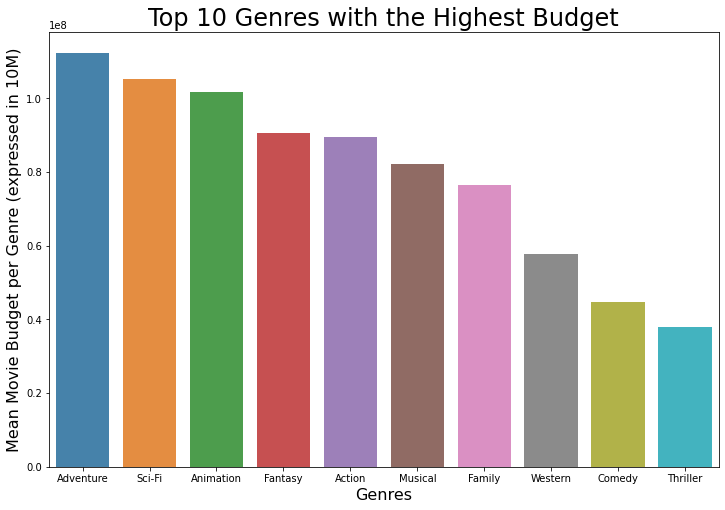

In [104]:
# Budget per genre  x = genre, y = avg(budget)
mean_budget = mean_budget[:10,]
plt.figure(figsize=(12,8))
sns.barplot(mean_budget.index, mean_budget.values, alpha=0.9)
plt.title('Top 10 Genres with the Highest Budget', fontsize=24)
plt.ylabel('Mean Movie Budget per Genre (expressed in 10M)', fontsize=16)
plt.xlabel('Genres', fontsize=16) 
plt.show()

In [105]:
mean_profit = genre_grp['gross_profit'].mean()
mean_profit.sort_values(ascending=False, inplace=True)

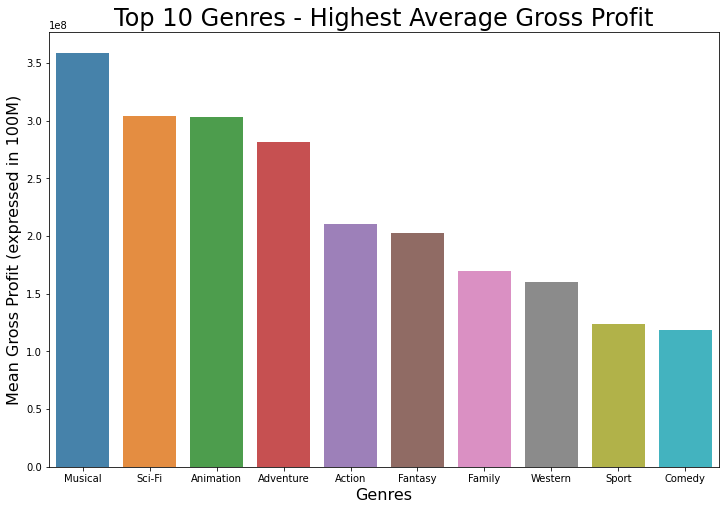

In [106]:
mean_profit = mean_profit[:10,]
plt.figure(figsize=(12,8))
sns.barplot(mean_profit.index, mean_profit.values, alpha=0.9)
plt.title('Top 10 Genres - Highest Average Gross Profit', fontsize=24)
plt.ylabel('Mean Gross Profit (expressed in 100M)', fontsize=16)
plt.xlabel('Genres', fontsize=16) 
plt.show()

In [107]:
correlation1 = mean_profit.corr(mean_budget)
correlation1

0.7292965816142425

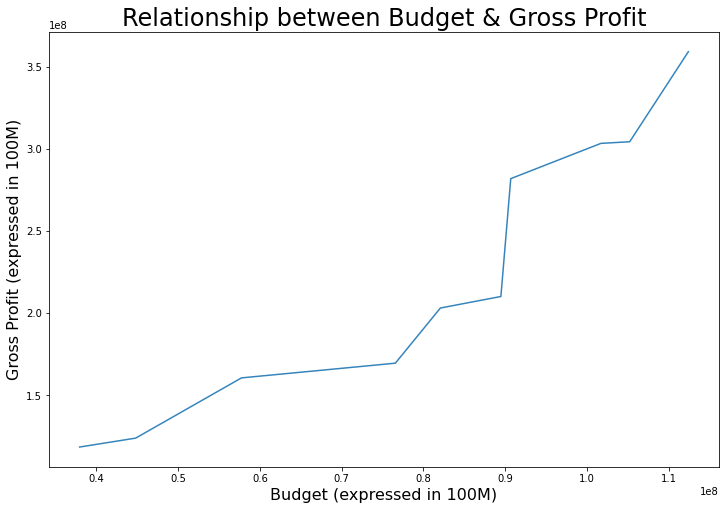

In [108]:
plt.figure(figsize=(12,8))
sns.lineplot(mean_budget.values, mean_profit.values, alpha=0.9)
plt.title('Relationship between Budget & Gross Profit', fontsize=24)
plt.ylabel('Gross Profit (expressed in 100M)', fontsize=16)
plt.xlabel('Budget (expressed in 100M)', fontsize=16) 
plt.show()

Up next we will define the mean gross profit margin. This represents how much is each genre getting in return per every dollar invested.

In [113]:
mean_margin = genre_grp['gross_margin'].mean().round(decimals=2)
mean_margin.sort_values(ascending=False, inplace=True)
mean_margin = mean_margin[:12,]
%store mean_margin

Stored 'mean_margin' (Series)


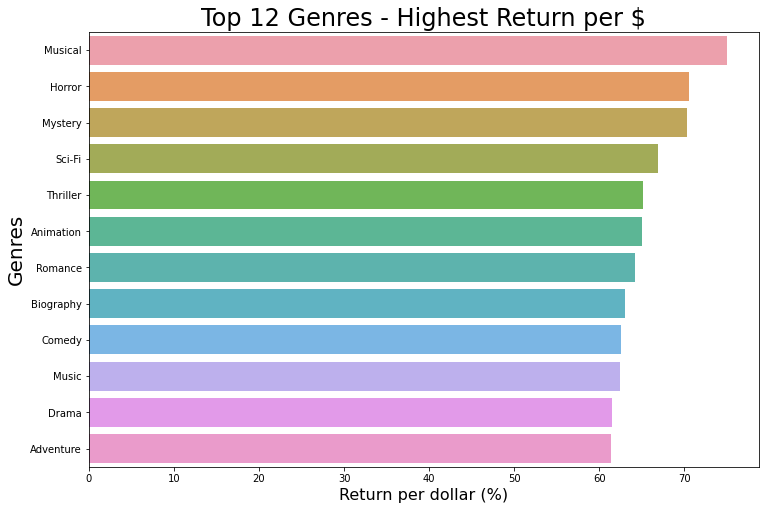

In [114]:
plt.figure(figsize=(12,8))
sns.barplot(mean_margin.values, mean_margin.index, alpha=0.9)
plt.title('Top 12 Genres - Highest Return per $', fontsize=24)
plt.ylabel('Genres', fontsize=20)
plt.xlabel('Return per dollar (%)', fontsize=16) 
plt.show()

In [115]:
correlation2 = mean_budget.corr(mean_margin)
correlation2

0.029331000411372318

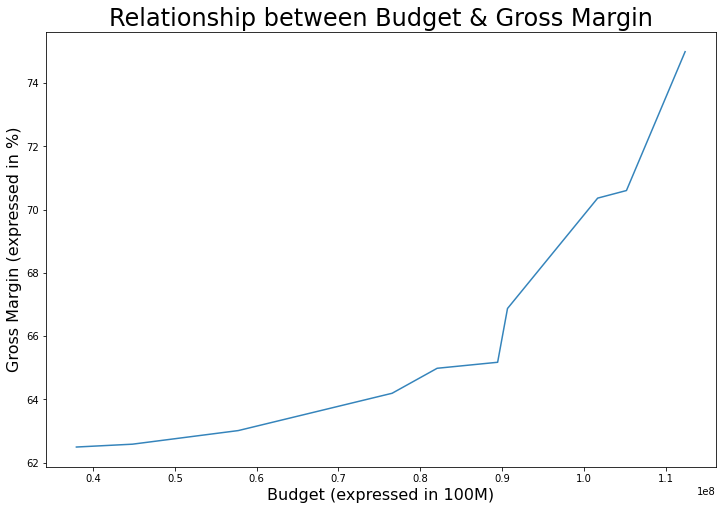

In [116]:
mean_margin = mean_margin[:10,]
plt.figure(figsize=(12,8))
sns.lineplot(mean_budget.values, mean_margin.values, alpha=0.9)
plt.title('Relationship between Budget & Gross Margin', fontsize=24)
plt.ylabel('Gross Margin (expressed in %)', fontsize=16)
plt.xlabel('Budget (expressed in 100M)', fontsize=16) 
plt.show()

### Inferences:
 * Drama, Documentary and Comedy are the Top 3 most produced genres.
 * There's a positive correlation between Budget, Gross Profit and Gross Proftit Margin for our Top 10 Genres.
 * Comedy, Adventure and Sci-Fi appear in all Top 10's.